In [1]:
from dotenv import dotenv_values

dotenv_data = dotenv_values('.env')
token = dotenv_data.get('IBM_TOKEN')

from qiskit_ibm_provider import IBMProvider

try:
    provider = IBMProvider(token=token)
    print("Successfully authenticated with IBM Quantum.")
except Exception as e:
    print("Error:", e)

Successfully authenticated with IBM Quantum.


Quantum Circuit:


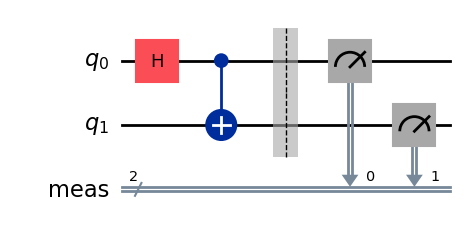

In [2]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

# Apply gates
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

print("Quantum Circuit:")
qc.draw("mpl")

In [3]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum", token=token)

# backend = service.least_busy(simulator=False, operational=True)
backend = service.get_backend('ibm_osaka')

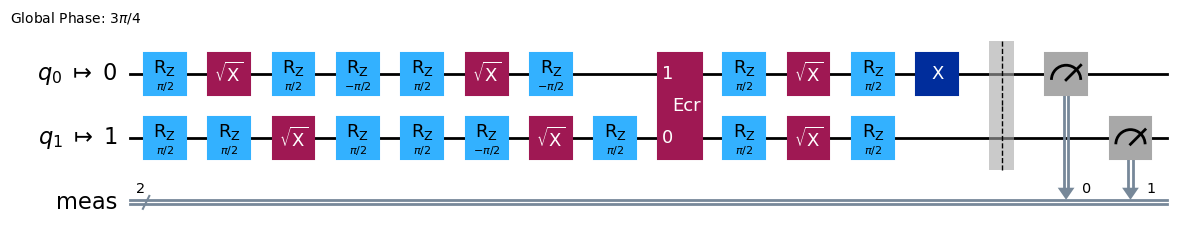

In [4]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=0)
show_steps = pm.run(qc)
show_steps.draw('mpl', idle_wires=False)

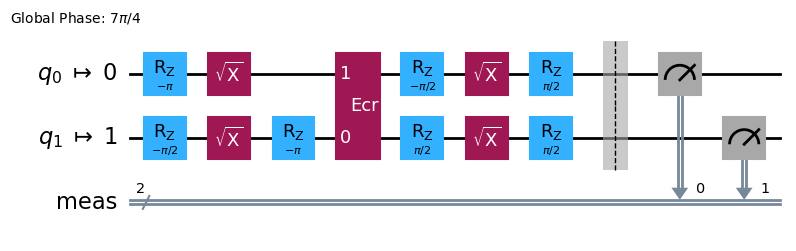

In [5]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
show_steps = pm.run(qc)
show_steps.draw('mpl', idle_wires=False)

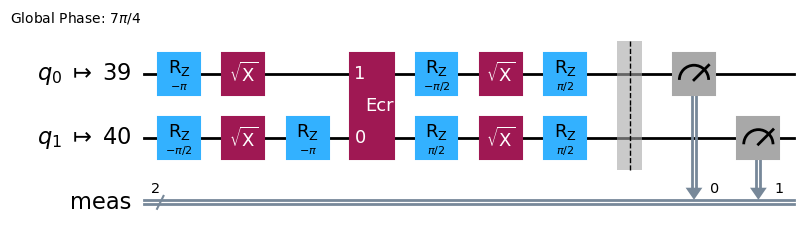

In [6]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=2)
show_steps = pm.run(qc)
show_steps.draw('mpl', idle_wires=False)

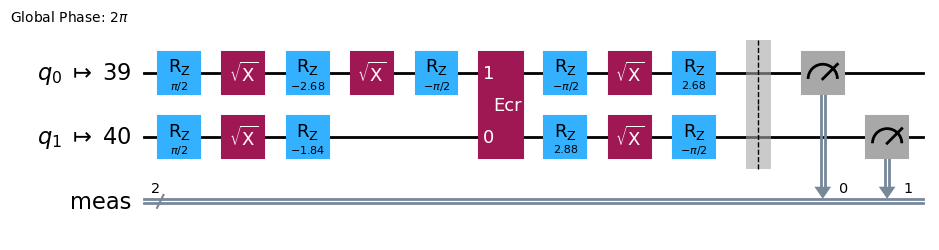

In [7]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(qc)
 
isa_circuit.draw('mpl', idle_wires=False)

In [8]:
result_ideal = backend.run(isa_circuit, shots=500)

In [9]:
job_id = result_ideal.job_id()

print("Job ID:", job_id)

result = provider.retrieve_job(job_id).result()
data = result.get_counts(isa_circuit)

Job ID: crdw8v369nf0008ffyb0


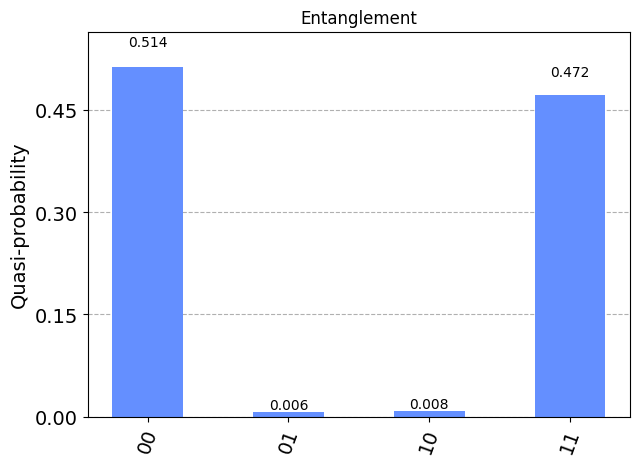

In [11]:
from qiskit.visualization import plot_histogram

total_counts = sum(data.values())
probabilities = {key: value / total_counts for key, value in data.items()}

plot_histogram(probabilities, title='Entanglement')

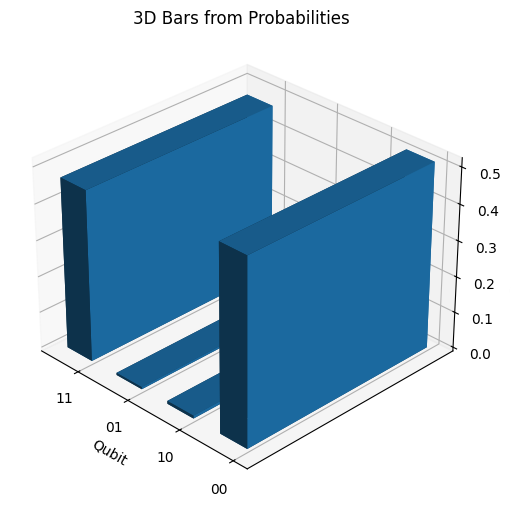

In [14]:
import matplotlib.pyplot as plt
import numpy as np

keys = list(probabilities.keys())
values = list(probabilities.values())

# Create X and Y positions
x_pos = np.arange(len(keys))
y_pos = np.arange(1)  # Assuming only one row

# Create meshgrid for 3D bars
x_pos, y_pos = np.meshgrid(x_pos, y_pos)

# Define width and depth of the bars
width = depth = 0.5

# Convert probabilities values to numpy array for normalization
values = np.array(values)

# Plot 3D histogram with square bars
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot bars
ax.bar3d(x_pos.flatten(), y_pos.flatten(), np.zeros_like(values), width, depth, values, shade=True)

# Set viewing angle
ax.view_init(elev=30, azim=135)

# Add gridlines
ax.grid(True)

# Set labels and title
ax.set_xticks(x_pos.flatten())
ax.set_xticklabels(keys)
ax.set_xlabel('Qubit')
ax.set_zlabel('Probability')
ax.set_title('3D Bars from Probabilities')

# Hide y-axis
ax.set_yticks([])

plt.show()